In [1]:
import pyAudioKits.audio as ak

Audio signals are divided into two categories: musical tone and noise. Among them, the musical tone is sound with a fixed pitch produced by the regular vibration of an object, while noise is the sound without a fixed pitch produced by the random vibration of an object. In this section, we are going to discuss the properties of two types of audio signals and their connection

# Monotone

A sine wave describes the most basic simple harmonic vibration. A sine wave whose waveform satisfies a fixed frequency and phase is a **monotone**. A monotone, in turn, is the most basic musical tone.

In [2]:
monotone=ak.create_Single_Freq_Audio(0.02,440,44100,1)	#Generate a monotone with a length of 1s, an amplitude of 0.02, a frequency of 440Hz, and a sampling rate of 44100
monotone.sound()	#Try playing it

The power of the audio:  0.00019999999999999996


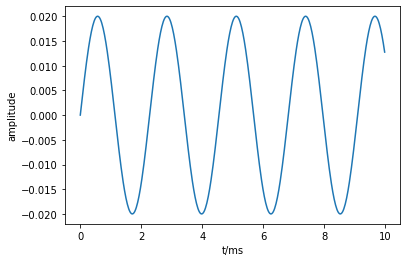

<Figure size 432x288 with 0 Axes>

In [3]:
monotone.plot(0, 10, xlabel="t/ms")   #Plot its waveform

The power of the audio $P=\frac{\displaystyle\sum_{n=0}^{N_{max}-1}x^2[n]}{N_{max}}$ determines the **loudness**. When we play an audio, its power will be displayed.

In [4]:
import pyAudioKits.analyse as aly

aly.power(monotone)

0.00019999999999999996

The power can also be expressed in the form of gain, $gain (dB) = 10log_{10} power$.

In [5]:
aly.power(monotone, dB = True)

-36.98970004336019

The energy $E=\displaystyle\sum_{n=0}^{N_{max}-1}x^2[n]$ is also a characteristic of audio. In the case of an audio signal with infinite time, the energy is defined as $E=\displaystyle\lim_{N_{max}\rightarrow ∞}\sum_{n=-N_{max}}^{N_{max}}x^2[n]$, while the power is defined as $P=\displaystyle\lim_{N_{max }\rightarrow ∞}\sum_{n=-N_{max}}^{N_{max}}\frac{x^2[n]}{2N_{max}}$. In this case, energy is defined only for audio signals of mean square convergence, and the power of such signals is 0. Such signals are called finite-energy signals and often imply a signal that has a value only at finite time, or a signal that decays with time. A signal with infinite energy but limited power is called a finite power signal. Since we truncate the audio signal by windowing, all signals are time-finite, have finite energy and power and are scaled by $N_{max}$. 

In [6]:
aly.energy(monotone)    #Calculated energy

8.819999999999999

Since the energy may be a large value when $N_{max}$ is large, it can also be calculated in the form of gain, which is call logarithmic energy.

In [7]:
aly.energy(monotone, dB=True)    #Calculating logarithmic energy

9.454685851318196

The power of a monotone is related to the **amplitude** of its corresponding sine wave.

In [8]:
monotone=monotone*2	#Turn the amplitude into twice the original
monotone.sound()	#Try playing it

The power of the audio:  0.0007999999999999998


The power becomes four times the original and the audio sounds louder.

The change in amplitude can also be written in the form of gain. $ gain (dB) = 20log_{10}\frac{new ~amplitude}{original~amplitude} = 10log_{10}\frac{new~power}{original~power}$

In [9]:
monotone=monotone.amplify(5)    #增益5dB
monotone.sound()	#播放一下试试

The power of the audio:  0.008000000000000002
In order to protect your hearing, the amplitude is limited. 


The power is changed to 10 times of the original. At the same time, the hearing protection mechanism of the sound function is triggered.

Next, we create a sine wave with higher frequency.

In [10]:
monotone2=ak.create_Single_Freq_Audio(0.02,880,44100,1)	#Generate a monotone with a length of 1s, an amplitude of 0.02, a frequency of 880Hz, and a sampling rate of 44100
monotone2.sound()	#Try playing it

The power of the audio:  0.0002


Frequency determines **pitch**. The $f=440Hz$ is called the central A. Doubling up in frequency is called an **octave**.

In twelve mean meters, each **half tone** is doubled in frequency by $2^{1/12}$. The distance between any two tones is called the interval, and the unit of interval is **degree**, the interval between the same single tones is 1 degree, and after that it increases by 1 degree for each difference in pitch.

In [11]:
monotone2=monotone2.pitch_shift(-12)	#Down-tune 12 semitones
monotone2.sound()	#Try playing it

/Users/harmonialeo/Documents/source/pyAudioKits/pyAudioKits/audio/audio.py:100: FutureWarning: Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return Audio(librosa.effects.pitch_shift(self.samples, self.sr, n_steps=halfSteps),self.sr)


The power of the audio:  0.0001967911023878219


The original frequency of monotone2 is 880Hz, after 12 semitones of down-tuning, the pitch is the same as monotone whose frequency is 440Hz.

Frequency can be studied using **autocorrelation function**. The autocorrelation function $\rho[k]=\displaystyle\sum_{m=-∞}^∞x[m]x[m+k]$ represents the structural similarity of a waveform before and after an offset of $k$ samples.

Since we truncate the audio signal, the autocorrelation function is computed as $\rho[k]=\displaystyle\sum_{m=-∞}^∞x'[m]x'[m+k],k\in\{-N_{max}+1, -N_{max}+2, ... , N_{max}-2, N_{max}-1\}$, where $x'[n]=\begin{cases}x[n],&0≤n<N_{max}\\0,&Others\end{cases}$. When $|k|<<N_{max}$, the effect is almost negligible. The obtained $\rho[k]$ can be represented by a vector of length $2N_{max}-1$. When $N_{max}$ is extremely large, a small part of $\rho[k]$ is usually intercepted.

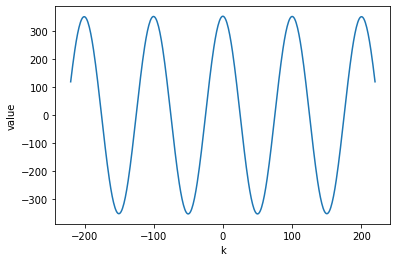

<Figure size 432x288 with 0 Axes>

In [12]:
aly.autocorr(monotone).plot(-220,221,xlabel="k")    #Compute the autocorrelation function of monotone and intercept the part of k taking [-220,221)

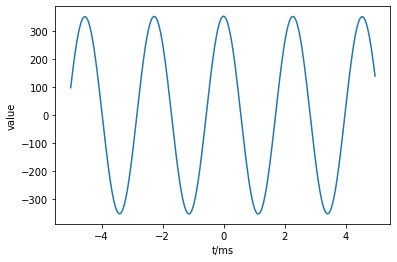

<Figure size 432x288 with 0 Axes>

In [13]:
aly.autocorr(monotone).plot(-5,5,xlabel="t/ms")    #Calculate the autocorrelation function of monotone and intercept the part of [-5ms,5ms)

It can be seen that the autocorrelation function has periodicity and is symmetric about $k=0$. Its period is around $k=100$. Since the sampling rate is $44100Hz$, 100 samples represent a time duration of about $2.27ms$. The frequency of monotone is $440Hz$, and its period is exactly about $2.27ms$. So we can determine the period of the monotone by the time interval of the local maxima in the autocorrelation function.

# Fundamental waves, harmonics and Fourier series

Next, let's explore the complex musical tones. First, 13 440Hz monotones are generated. On top of this, when generate the nth 440Hz monotone, generate another 1s monotone with frequency $440-2^{(n-1)/12}Hz$, which is linearly summed with the original monotone for **chords**, thus simulating all **intervals** from minor second to pure octave.

In [14]:
x = ak.create_Single_Freq_Audio(0.02,440,44100,1) + ak.create_Single_Freq_Audio(0.02,440,44100,1)
for i in range(12):
    x = ak.concatenate([x,ak.create_Single_Freq_Audio(0,440,44100,1)]) #Add a 1 second gap after each chord
    x = ak.concatenate([x,ak.create_Single_Freq_Audio(0.02,440,44100,1) + ak.create_Single_Freq_Audio(0.02,440*2**((i+1)/12),44100,1)])
x.sound()

The power of the audio:  0.0002241272982532446


The generated 26s audio has 13 chords with different intervals, some of which sound harmonious and some of which sound dissonant.

1. minor diatonic intervals (one semitone apart) and major seventh intervals (five whole tones and one semitone apart) are highly discordant intervals
2. major intervals (one whole tone difference), minor intervals (five whole tones difference), and triplets (three whole tones) are discordant intervals
3. minor third interval (difference of one whole tone and one semitone), major third interval (difference of two whole tones), minor sixth interval (difference of four whole tones), major sixth interval (difference of four whole tones and one semitone) are not fully harmonized intervals
4. pure fourth intervals (two whole tones and one semitone difference), pure fifth intervals (three whole tones and one semitone difference) are fully consonant intervals
5. pure octave (six whole tones apart) is a very complete concord interval

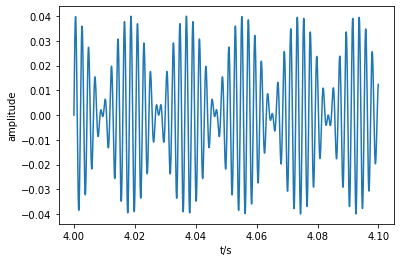

<Figure size 432x288 with 0 Axes>

In [15]:
x.plot(4,4.1)

It can be seen that the waveform of such a chord is far from being called a sine wave, but this strange waveform is created by superimposing two sine waves of different frequencies. In fact, according to **Fourier series**, any waveform of a periodic signal can be expanded into the form of a superposition of sine waves of different phases, frequencies and amplitudes.

A continuous time periodic signal, if its period is $T$, has **fundamental frequency**$\omega_0=\frac{2\pi}{T}$. And any periodic signal can be represented as the sum of **fundamental wave component** and **k+1th (k=1,2,...) harmonic components**, where the frequency of the k+1th harmonic component is k+1 times the fundamental frequency $\omega_0$. The weights of each component are called **Fourier coefficients** and are denoted by $a_k$ as follows: 

$x(t)=\displaystyle\sum_{k=-∞}^∞a_ke^{jk\omega_0t}=\displaystyle\sum_{k=-∞}^∞a_ke^{jk\frac{2\pi}{T}t}$

$a_k=\displaystyle\frac{1}{T}\int_Tx(t)e^{-jk\omega_0t}dt=\frac{1}{T}\int_Tx(t)e^{-jk\frac{2\pi}{T}t}dt$

The Fourier coefficients determine the amplitude of each component.

The Fourier series can also be written in the form of a trigonometric function: $x(t)=c_0+\displaystyle\sum_{k=1}^∞[a_kcos(\frac{2\pi k}{T} t)+b_k sin(\frac{2\pi k}{T} t)]$, where $c_0=\frac{1}{T}\displaystyle\int_{T}x(t)dt$, $a_k=\frac{2}{T}\displaystyle\int_Tx(t)cos(\frac{2\pi k}{T}t)dt$, $b_k=\frac{2}{T}\displaystyle\int_Tx(t )sin(\frac{2\pi k}{T}t)dt$.

The waveforms of musical tones from actual instruments in the real world are all quite complex. However, musical sound can basically be described by three elements, which are **pitch**, **loudness** and **timbre**. The loudness of the sound is determined by the power, as mentioned before. The pitch of the sound is determined by the **fundamental wave** with the largest amplitude, whose frequency is **fundamental frequency**. In addition to the fundamental wave, there are numerous **harmonics** or **overtones** whose frequency are integer multiples of the fundamental frequency. The amplitude of these **harmonics** or **overtones** determines the characteristics of the waveform and the **timbre** of the audio.

Sine and cosine signals of 1, 5, 10, 20, and 50 frequencies are generated between 220-11000Hz to simulate harmonics, and the amplitudes are generated randomly and descending with the increasing of frequency.

In [16]:
import numpy as np
import random

random.seed(0)

def generate_timbre(K):
    return ak.synthesis([ak.create_Single_Freq_Audio(random.uniform(0.0,0.05)/i,220 * i,44100,1,np.pi/2)+ak.create_Single_Freq_Audio(random.uniform(0.0,0.05)/i,220 * i,44100,1) for i in range(1,K+1)])

p = generate_timbre(1)
p.sound()
p = generate_timbre(5)
p.sound()
p = generate_timbre(10)
p.sound()
p = generate_timbre(20)
p.sound()
p = generate_timbre(50)
p.sound()

The power of the audio:  0.0016094289253369737
The power of the audio:  0.0006342329657102692
The power of the audio:  0.0014485557278367813
The power of the audio:  0.001302351598106276
The power of the audio:  0.0016324227654416416


We have generated five electronic tones with different timbres.

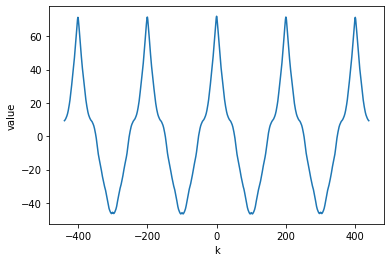

<Figure size 432x288 with 0 Axes>

In [17]:
aly.autocorr(p).plot(-440,441,xlabel="k")    #Compute the autocorrelation function of p and intercept the part of k taking [-440,441)

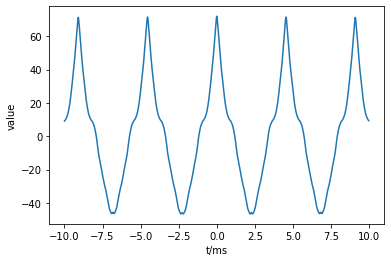

<Figure size 432x288 with 0 Axes>

In [18]:
aly.autocorr(p).plot(-10,10,xlabel="t/ms")    #Compute the autocorrelation function of p and intercept the part of [-10ms,10ms)

Observe the autocorrelation function and we can find that although the audio p consists of superimposed components of several frequencies, the period is still about 200 samples, corresponding to a duration of about $4.54ms$, which is the period of a $220Hz$ sine wave.

In [19]:
aly.getMaxFrequency(p)

(220.0, 0.0449080316623462)

The getMaxFrequency function gets the frequency component and amplitude of the largest amplitude in the audio. It can be seen that $220Hz$ is the main frequency component in the audio.

# Noise

Noise is an audio signal with no apparent pitch, usually generated by random vibrations. A typical noise is **white noise**, which has the property $\gamma(\tau)=\begin{cases}\sigma^2,& \tau=0\\0,& Others\end{cases}$, i.e., the self-covariance function is equal to the variance when when the time difference $\tau$ is 0, and the covariance is 0 at all other moments. if the white noise is consisted of i.i.d. samples from the zero-mean Gaussian distribution $N(0,\sigma^2)$, it is called **Gaussian white noise**.

When a stochastic process **any finite dimensional distribution function is only related to the time difference**, that is, if the stochastic process $\{X(t),t\in T\}$ satisfies: for any $n\in N$, any $t_1,t_2,... ,t_n\in T$, and any h, when $t_i+h\in T,i=1,2,... ,n$, the n-dimensional random variables $(X(t_1),X(t_2),... ,X(t_n))$ and $(X(t_1+h),X(t_2+h),... ,X(t_n+h))$** have the same distribution function, the process is a **stationary stochastic process**. The definition of stationary stochastic process is very strict, usually we use the general definition of **generalized stationary stochastic process**: **the first two order moments are independent of t and the autocorrelation function is only related to the time interval**. Gaussian white noise is also a typical generalized stationary stochastic process.

For a stationary stochastic process, define the time mean of the stochastic process $X(t)$ as $<X(t)>=\displaystyle\lim_{T\rightarrow ∞}\int_{-T}^TX(t)dt$ and the time correlation function as $<X(t)X(t+\tau)>=\displaystyle\lim_ {T\rightarrow ∞}\int_{-T}^TX(t)X(t+\tau)dt$. If $P\{<X(t)>=E\{X(t)\}=\mu_X\}=1$, then the mean value of the process is said to have **ergodicity**, and if $P\{<X(t+\tau)X(t)>=E\{X(t+\tau)X (t)\}=R_X(\tau)\}=1$, then the self-covariance function of the process is said to have **ergodicity**. The stochastic process with ergodicity can use the time mean to estimate the expectation, and the integral over time of the self-covariance function can be used to estimate the integral over the probability density. Therefore, a long enough single realization of the stochastic process with ergodicity can be used to estimate the first and second order moments of the process.

For the analog audio signal corresponding to the random process with ergodicity, we only need to represent its one realization as a digital audio signal of sufficient length, then we can estimate its mean, variance, and self-covariance functions.

Noise also has energy and power, and its calculation method and meaning are the same as musical tones. For Gaussian white noise, the power is equal to the variance $\sigma^2$.

If noise is mixed with another audio signal, using the power of signal and noise we can define the signal-to-noise ratio: $snr=10log_{10}\frac{P_{signal}}{P_{noise}}(dB)$.

In [20]:
monotone_without_wn = ak.create_Single_Freq_Audio(0.02,440,44100,1)
monotone_with_wn = monotone_without_wn.addWgn(10)   #在单音上加上信噪比为10dB的高斯白噪音
monotone_with_wn.sound()

The power of the audio:  0.00022002572458715804


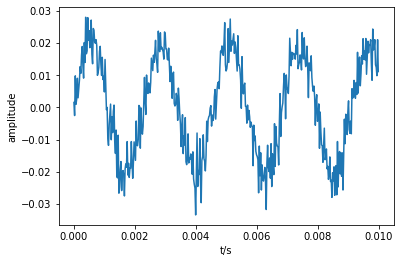

<Figure size 432x288 with 0 Axes>

In [21]:
monotone_with_wn.plot(0, 0.01)

In [22]:
wn = monotone_with_wn - monotone_without_wn #Subtract the monotone, leaving only white noise
wn.sound()

The power of the audio:  1.9981753738607665e-05


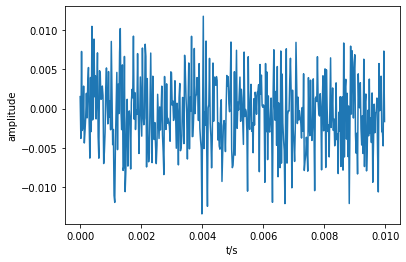

<Figure size 432x288 with 0 Axes>

In [23]:
wn.plot(0, 0.01)

In [24]:
np.mean(wn.samples), np.var(wn.samples)

(-4.358634195667403e-05, 1.99798539694025e-05)

It can be seen that the mean value of white noise is close to 0, while the variance is equal to the power.

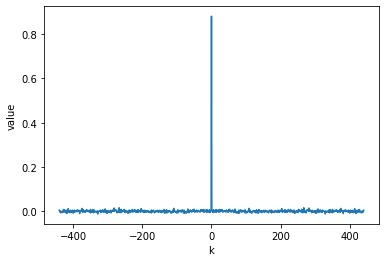

<Figure size 432x288 with 0 Axes>

In [25]:
aly.autocorr(wn).plot(-440,441,xlabel="k")

The autocorrelation function of white noise is significantly greater than 0 when and only when $k=0$.

Consider such a general stochastic process: $X_t=c_0+\displaystyle \sum_{k=1}^∞ [a_k sin(\frac{2\pi k}{T} t)+b_k cos(\frac{2\pi k}{T} t)]+\alpha_t,-∞<t<∞$, where $\alpha_t$ describes the random vibration, and $\displaystyle \sum_{k=1}^∞ [a_k sin(\frac{2\pi k}{T} t)+b_k cos(\frac{2\pi k}{T} t)]+c_0$ is the Fourier series representation of an arbitrary deterministic periodic signal, we first assume that $a_k$, $b_k$, $c _0$, $T$ are constants invariant with time, and $\alpha_t$ is a single realization of a stationary random process. At this point the mean value of this stochastic process changes with time, so it is obviously not a stationary stochastic process. However, we can decompose the stochastic process into random and non-random parts, so that the random part is a stationary stochastic process, while the non-random part is a superposition of numerous deterministic sinusoidal signals.